## Geneformer Fine-Tuning for Classification of Dosage-Sensitive vs. -Insensitive Transcription Factors (TFs)

### Please note that, as usual with deep learning models, we **highly** recommend tuning learning hyperparameters for all fine-tuning applications as this can significantly improve model performance. Example below uses default hyperparameters, but please see the "hyperparam_optimiz_for_disease_classifier" script for an example of how to tune hyperparameters for downstream applications. Importantly, these hyperparameters do not represent uniformly applicable or recommended hyperparameters.

### Train gene classifier with 5-fold cross-validation:

In [1]:
import datetime
import pickle
from geneformer import Classifier

current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
datestamp_min = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}"

output_prefix = "tf_dosage_sens_test"
output_dir = f"/path/to/output_dir/{datestamp}"
!mkdir $output_dir

In [2]:
# Example input_data_file: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/blob/main/example_input_files/gene_classification/dosage_sensitive_tfs/dosage_sensitivity_TFs.pickle
with open("/path/to/dosage_sensitivity_TFs.pickle", "rb") as fp:
    gene_class_dict = pickle.load(fp)

In [3]:
# OF NOTE: model_version should match version of model to be used (V1 or V2) to use the correct token dictionary
cc = Classifier(classifier="gene",
                gene_class_dict = gene_class_dict,
                max_ncells = 10_000,
                freeze_layers = 4,
                num_crossval_splits = 5,
                forward_batch_size=200,
                model_version="V1",  # OF NOTE: SET TO V1 MODEL, PROVIDE V1 MODEL PATH IN SUBSEQUENT CODE
                nproc=16)

Hyperparameter tuning is highly recommended for optimal results. No training_args provided; using default hyperparameters.


In [4]:
# Example input_data_file for 30M model series: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/gene_classification/dosage_sensitive_tfs/gc-30M_sample50k.dataset
cc.prepare_data(input_data_file="/path/to/gc-30M_sample50k.dataset",
                output_directory=output_dir,
                output_prefix=output_prefix)

Saving the dataset (0/1 shards):   0%|          | 0/33558 [00:00<?, ? examples/s]

In [5]:
# V1 model: https://huggingface.co/ctheodoris/Geneformer/blob/main/Geneformer-V1-10M/model.safetensors
all_metrics = cc.validate(model_directory="/path/to/Geneformer",  # OF NOTE: SET TO V1 MODEL ABOVE, PROVIDE V1 MODEL PATH HERE
                          prepared_input_data_file=f"{output_dir}/{output_prefix}_labeled.dataset",
                          id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
                          output_directory=output_dir,
                          output_prefix=output_prefix)

0it [00:00, ?it/s]

****** Validation split: 1/5 ******



Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /gladstone/theodoris/home/ctheodoris/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/gladstone/theodoris/home/ctheodoris/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}


Step,Training Loss
83,0.729100
166,0.667600
249,0.553100
332,0.409100
415,0.294300
498,0.197000
581,0.138300
664,0.099900
747,0.083700
830,0.072300


****** Validation split: 2/5 ******



Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /gladstone/theodoris/home/ctheodoris/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/gladstone/theodoris/home/ctheodoris/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}


Step,Training Loss
83,0.695400
166,0.634600
249,0.540200
332,0.414800
415,0.298500
498,0.199100
581,0.133200
664,0.096300
747,0.078100
830,0.068100


****** Validation split: 3/5 ******



Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /gladstone/theodoris/home/ctheodoris/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/gladstone/theodoris/home/ctheodoris/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}


Step,Training Loss
83,0.708600
166,0.656300
249,0.553600
332,0.430600
415,0.300000
498,0.202900
581,0.144700
664,0.109900
747,0.096000
830,0.086700


****** Validation split: 4/5 ******



Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /gladstone/theodoris/home/ctheodoris/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/gladstone/theodoris/home/ctheodoris/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}


Step,Training Loss
83,0.697500
166,0.632000
249,0.524600
332,0.394300
415,0.264700
498,0.180100
581,0.128300
664,0.094200
747,0.082200
830,0.078500


****** Validation split: 5/5 ******



Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /gladstone/theodoris/home/ctheodoris/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/gladstone/theodoris/home/ctheodoris/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}


Step,Training Loss
83,0.711400
166,0.644000
249,0.535900
332,0.395400
415,0.275400
498,0.193600
581,0.129300
664,0.093300
747,0.070000
830,0.067100


<Figure size 1000x1000 with 0 Axes>

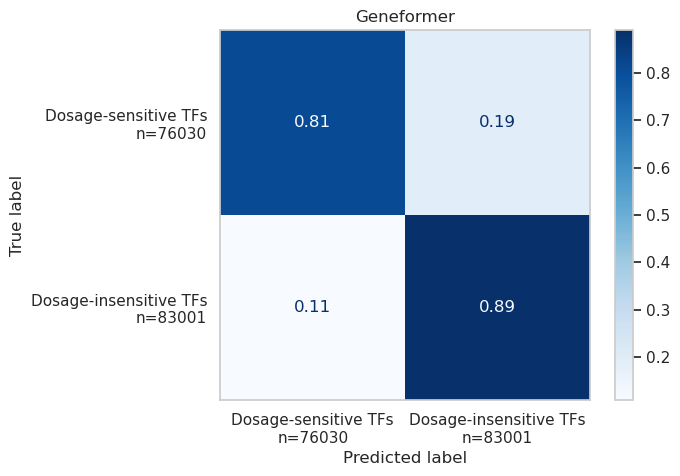

<Figure size 640x480 with 0 Axes>

In [6]:
cc.plot_conf_mat(
    conf_mat_dict={"Geneformer": all_metrics["conf_matrix"]},
    output_directory=output_dir,
    output_prefix=output_prefix,
)

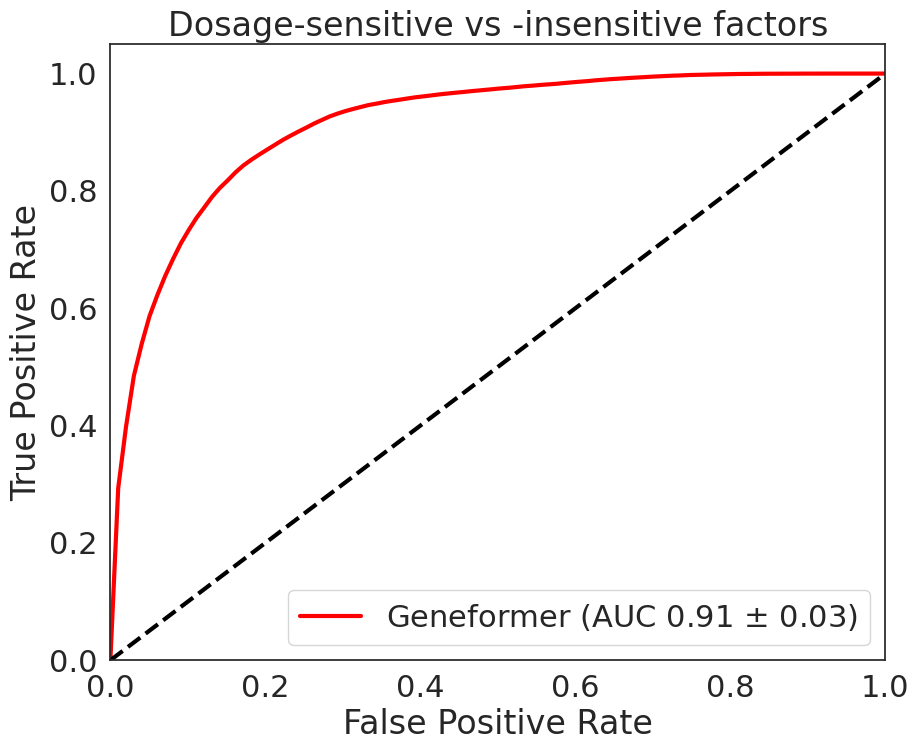

<Figure size 640x480 with 0 Axes>

In [7]:
cc.plot_roc(
    roc_metric_dict={"Geneformer": all_metrics["all_roc_metrics"]},
    model_style_dict={"Geneformer": {"color": "red", "linestyle": "-"}},
    title="Dosage-sensitive vs -insensitive factors",
    output_directory=output_dir,
    output_prefix=output_prefix,
)

In [8]:
all_metrics

{'conf_matrix':                         Dosage-sensitive TFs  Dosage-insensitive TFs
 Dosage-sensitive TFs                 61229.0                 14801.0
 Dosage-insensitive TFs                9094.0                 73907.0,
 'macro_f1': [0.8489695337205987,
  0.8637730998133415,
  0.9122635701525341,
  0.8180200155972593,
  0.7913574275548942],
 'acc': [0.8544562281799618,
  0.8647275498539312,
  0.9122812348079727,
  0.8182044035899506,
  0.798060129740519],
 'all_roc_metrics': {'mean_tpr': array([0.        , 0.29330305, 0.39824459, 0.48477052, 0.53910681,
         0.58654819, 0.62233428, 0.65499297, 0.68383714, 0.7105218 ,
         0.7331015 , 0.75404762, 0.77191402, 0.79007262, 0.80530801,
         0.81812243, 0.83182971, 0.84348565, 0.85308334, 0.86179954,
         0.87018186, 0.87841599, 0.88666193, 0.89398957, 0.90104605,
         0.90768847, 0.91468381, 0.92081589, 0.92687436, 0.93170239,
         0.93600138, 0.93963402, 0.9430781 , 0.94641134, 0.94881205,
         0.95143243,

### Train gene classifier with all data:

In [9]:
import datetime
import pickle
from geneformer import Classifier

current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
datestamp_min = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}"


output_prefix = "tf_dosage_sens_alldata"
output_dir = f"/path/to/output_dir/{datestamp}"
!mkdir $output_dir

In [10]:
# Example input_data_file: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/blob/main/example_input_files/gene_classification/dosage_sensitive_tfs/dosage_sensitivity_TFs.pickle
with open("/path/to/dosage_sensitivity_TFs.pickle", "rb") as fp:
    gene_class_dict = pickle.load(fp)

In [11]:
# OF NOTE: model_version should match version of model to be used (V1 or V2) to use the correct token dictionary
cc = Classifier(classifier="gene",
                gene_class_dict = gene_class_dict,
                max_ncells = 10_000,
                freeze_layers = 4,
                num_crossval_splits = 0,
                forward_batch_size=200,
                model_version="V1",  # OF NOTE: SET TO V1 MODEL, PROVIDE V1 MODEL PATH IN SUBSEQUENT CODE
                nproc=16)

Hyperparameter tuning is highly recommended for optimal results. No training_args provided; using default hyperparameters.


In [12]:
# Example input_data_file: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/gene_classification/dosage_sensitive_tfs/gc-30M_sample50k.dataset
cc.prepare_data(input_data_file="/path/to/gc-30M_sample50k.dataset",
                output_directory=output_dir,
                output_prefix=output_prefix)

Saving the dataset (0/1 shards):   0%|          | 0/33558 [00:00<?, ? examples/s]

In [13]:
# V1 model: https://huggingface.co/ctheodoris/Geneformer/blob/main/Geneformer-V1-10M/model.safetensors
trainer_test = cc.train_all_data(model_directory="/path/to/Geneformer",  # OF NOTE: SET TO V1 MODEL ABOVE, PROVIDE V1 MODEL PATH HERE
                                 prepared_input_data_file=f"{output_dir}/{output_prefix}_labeled.dataset",
                                 id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
                                 output_directory=output_dir,
                                 output_prefix=output_prefix)

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

mkdir: cannot create directory ‘/gladstone/theodoris/home/ctheodoris/temp/test_suite_output/classifer_tests/240224031008/240224_geneformer_geneClassifier_tf_dosage_sens_alldata/’: File exists
Some weights of BertForTokenClassification were not initialized from the model checkpoint at /gladstone/theodoris/home/ctheodoris/Geneformer and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
/gladstone/theodoris/home/ctheodoris/Geneformer/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batc

Step,Training Loss
83,0.700600
166,0.643100
249,0.544700
332,0.412900
415,0.298600
498,0.205700
581,0.138900
664,0.103200
747,0.090000
830,0.083100
